# 모델 평가와 성능 향상

1. 교차검증
    - 데이터를 단순히 train_set, test_set으로 나누지 않고,
    - 데이터를 여러 번 반복해서 나누고 여러 모델을 학습시킴.
    - train_test_split은 임의로 data를 분할하기 때문에 정확도가 정확하지 않다.
    - 하지만 교차검증 사용 시 모든 sample은 test set로 정확히 한번씩만 사용된다.
    - 따라서 교차검증의 정확도를 높이기 위해서는 모든 sample에 대해 일반화가 잘 되어야 한다.
    - 또한 train_test_split보다 data를 더 효율적으로 사용할 수 있음.(5-fold만 되도 80%를 train_set으로 사용, k값이 증가할 수록 train_set에 사용하는 data가 증가함)
    - 회귀에서는 k-fold cross validation, 분류에서는 stratified k-fold cross validation을 보통 사용

    1-1) k-fold cross-validation(k겹 교차검증)
        - data를 fold라는 거의 비슷한 크기의 부분집합 k개로 나눈 뒤
        - 첫 번째 모델은 첫번째 fold를 test set으로 사용(2~k까지 train_set이 된다)
        - 이런 식으로 k번 진행하여 각 모델의 정확도 값을 얻게된다.
        
    1-2) stratified k-fold cross-validation(계층별 k-겹 교차검증)
        - k-fold cross-validation과 같이 데이터셋 나열 순서에 따라 fold를 나누게 나열된 데이터셋에 따라 정확도가 현저히 떨어질 수 있음.
        - 따라서 fold안 class 비율이 전체 data set의 class 비율과 같도록 데이터를 조정하는 방식
        
    1-3) shuffle-split cross-validation(임의 분할 교차 검증)
        - train_size만큼의 포인트로 훈련세트를 만들고, test_size만큼의 포인트로 test size를 만든다.
        - 이러한 분할을 n_splits번 반복
        - size값에 정수를 대입하면 절대개수, 실수를 대입하면 %로 인식.
        - train_size와 test_size의 크기를 독립적으로 조절해야할 때 유용
        
    1-4) 그룹별 교차검증
        - 사진 속 얼굴 표정을 평가하는 시스템을 만든다고 가정했을 때,
        - 새 얼굴에 대한 일반화 성능을 더 정확하게 평가하기 위해서는 train_set와 test_set에 서로 다른 사진이 들어가야함.
        (같은 얼굴 사진이 train, test set에 모두 있다면 정확도가 더 증가하므로)
        - 따라서 group을 지정하여 train_set과 test_set에 구분되도록 할 수 있음.(GroupKFold이용)
        
    1-5) 반복 교차검증
        - 데이터셋 크기가 크지 않을 때 안정적인 검증 score를 얻기 위해 교차검증을 반복하여 수행하기도 함.
        - RepeatedKFold, RepeatedStratifiedKFold
        - n_splits: fold수 결정, n_repeats: 반복 수 결정

k-fold cross validation 예제

In [1]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
import mglearn

In [2]:
iris = load_iris()
logreg = LogisticRegression(max_iter=1000)

scores = cross_val_score(logreg, iris.data, iris.target)
print("cross validation score:",scores)

cross validation score: [0.96078431 0.92156863 0.95833333]


C:\Users\minuk\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\minuk\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\minuk\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\minuk\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\minuk\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning

In [5]:
# 매개변수 cv에 값을 전달하여 fold수를 조정 가능
scores = cross_val_score(logreg, iris.data, iris.target, cv=5)
print("cross validation score:",scores)
print("cross validation mean score:{:.3f}".format(scores.mean()))

cross validation score: [1.         0.96666667 0.93333333 0.9        1.        ]
cross validation mean score:0.960


C:\Users\minuk\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\minuk\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\minuk\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\minuk\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\minuk\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default so

In [6]:
# cross_validate 함수를 이용하면 train과 test에 걸린 시간을 알 수 있다.
# 실제로 cross_val_score는 cross_validate을 이용하는 것.
from sklearn.model_selection import cross_validate
res = cross_validate(logreg, iris.data, iris.target, cv=5, return_train_score=True)
display(res)

C:\Users\minuk\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\minuk\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\minuk\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\minuk\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\minuk\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default so

{'fit_time': array([0.00299931, 0.00199676, 0.00199699, 0.00200319, 0.00199723]),
 'score_time': array([0.        , 0.        , 0.00099945, 0.0009973 , 0.00100589]),
 'test_score': array([1.        , 0.96666667, 0.93333333, 0.9       , 1.        ]),
 'train_score': array([0.95      , 0.96666667, 0.96666667, 0.975     , 0.95833333])}

stratified k-fold cross-validation 예제

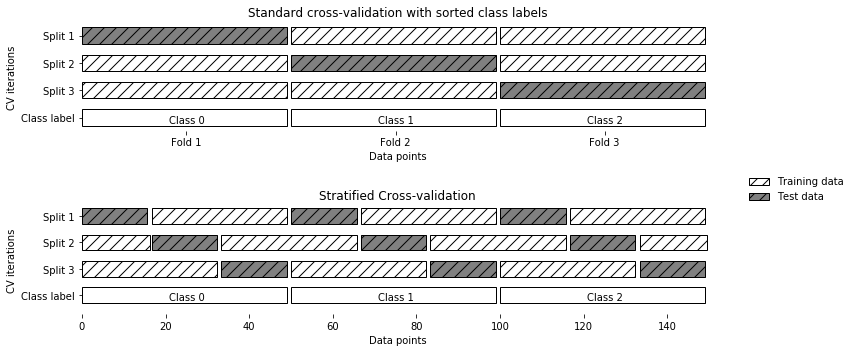

In [8]:
mglearn.plots.plot_stratified_cross_validation()

In [11]:
#cross_val_score의 cv값에 교차 검증 분할기(cross-validation splitter를 전달할 수 있음)
# ex1) 분류에서 k-fold cross validation이용
from sklearn.model_selection import KFold
kfold = KFold(n_splits=5)
print("cross validation score:\n",cross_val_score(logreg, iris.data, iris.target, cv=kfold))

cross validation score:
 [1.         0.93333333 0.43333333 0.96666667 0.43333333]


C:\Users\minuk\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\minuk\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\minuk\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\minuk\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\minuk\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default so

In [13]:
kfold = KFold(n_splits=3)
print("cross validation score:\n",cross_val_score(logreg, iris.data, iris.target, cv=kfold))
# data 나열에 따라 score가 0점이 나올 수 있음.
# 이 때 stratified k-fold를 사용할 수도 있지만, KFold에 shffle 매개변수를 전달하여 해결할 수도 있음
kfold2 = KFold(n_splits=3, shuffle=True, random_state=0)
print("cross validation score:\n",cross_val_score(logreg, iris.data, iris.target, cv=kfold2))

cross validation score:
 [0. 0. 0.]
cross validation score:
 [0.9  0.96 0.96]


C:\Users\minuk\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\minuk\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\minuk\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\minuk\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\minuk\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class o

shffle-split cross-validation(임의 분할 교차검증)

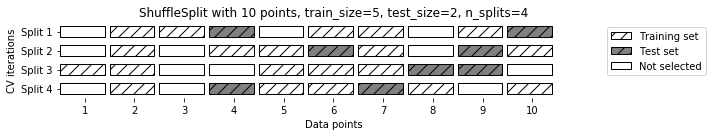

In [15]:
mglearn.plots.plot_shuffle_split()

In [16]:
from sklearn.model_selection import ShuffleSplit
shuffle_split = ShuffleSplit(test_size=.5, train_size=.5, n_splits=10)
scores = cross_val_score(logreg, iris.data, iris.target, cv=shuffle_split)
print("cross validation score:",scores)

cross validation score: [0.90666667 0.93333333 0.92       0.93333333 0.92       0.96
 0.98666667 0.97333333 0.93333333 0.96      ]


C:\Users\minuk\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\minuk\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\minuk\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\minuk\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\minuk\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default so

그룹별 교차검증

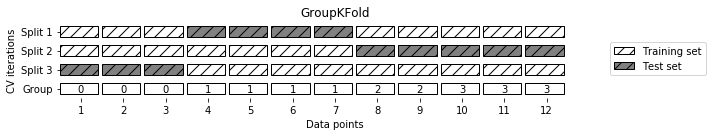

In [17]:
mglearn.plots.plot_group_kfold()

In [20]:
from sklearn.model_selection import GroupKFold
from sklearn.datasets import make_blobs
X,y = make_blobs(n_samples=12, random_state=0)
groups = [0,0,0,1,1,1,1,2,2,3,3,3]
scores = cross_val_score(logreg, X,y,groups, cv=GroupKFold(n_splits=3))
print("cross validation score:",scores)

cross validation score: [0.75       0.8        0.66666667]


C:\Users\minuk\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\minuk\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\minuk\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\minuk\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\minuk\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default so

반복 교차검증
(RepeatedKFold, RepeatedStratifiedKFold)

In [22]:
from sklearn.model_selection import RepeatedStratifiedKFold

rskfold = RepeatedStratifiedKFold(random_state=42, n_splits=5, n_repeats=10)
#5-fold 이며, 반복을 10회하는 것
scores = cross_val_score(logreg, iris.data, iris.target, cv=rskfold)
print("cross validation score:\n",scores)
print("cross validation mean score:{:.3f}".format(scores.mean()))

cross validation score:
 [0.96666667 0.96666667 0.96666667 0.93333333 0.96666667 0.86666667
 0.96666667 0.96666667 0.93333333 0.96666667 1.         1.
 0.93333333 0.93333333 0.93333333 1.         0.96666667 0.96666667
 0.9        0.96666667 0.96666667 0.96666667 1.         0.9
 0.96666667 0.93333333 1.         0.96666667 0.96666667 0.93333333
 0.96666667 0.93333333 0.96666667 0.96666667 0.96666667 0.96666667
 0.93333333 0.93333333 0.96666667 1.         0.96666667 0.96666667
 0.86666667 1.         0.93333333 1.         0.96666667 1.
 0.93333333 0.9       ]
cross validation mean score:0.957


C:\Users\minuk\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\minuk\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\minuk\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\minuk\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\minuk\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default so